In [1]:
# Initial imports
import pandas as pd
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Resources/data_preprocesed_lact_3.csv')

In [3]:
df

,Unnamed: 0,id,lactation_1,lactation_2,lactation_3,total_production_1,total_production_2,total_production_3,milk_days_1,milk_days_2,...,mastitis_lac_1,mastitis_lac_2,mastitis_lac_3,inseminacion_lac_1,inseminacion_lac_2,inseminacion_lac_3,abortos_Lac_1,abortos_lac_2,abortos_lac_3,production_ok
0,0,5,1,1,1,7817,9123,9129,288,319,...,0,0,0,1,3,1,0,0,0,0
1,1,9,1,1,1,7793,10019,7907,290,322,...,0,0,0,1,3,1,0,0,0,0
2,2,16,1,1,1,10402,10293,10363,340,392,...,0,0,0,2,2,1,0,0,0,1
3,3,27,1,1,1,9367,11250,2090,334,403,...,0,0,0,2,5,0,0,0,0,0
4,4,121,1,1,1,11491,12403,13318,343,294,...,0,0,0,4,2,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,2683,20406,1,1,0,8095,0,0,311,11,...,0,0,-1,2,0,-1,0,0,-1,0
2684,2684,20407,1,1,0,7432,1992,0,268,58,...,0,0,-1,1,0,-1,0,0,-1,0
2685,2685,20408,1,1,0,7880,0,0,308,9,...,0,0,-1,2,0,-1,0,0,-1,0
2686,2686,20409,1,1,0,8414,2098,0,266,48,...,0,0,-1,1,0,-1,0,0,-1,0


In [4]:
import numpy as np

In [5]:
df_new = df[[
     'lactation_1', 'lactation_2', 'total_production_1', 'total_production_2', 'milk_days_1', 'milk_days_2', 'mastitis_lac_1',
       'mastitis_lac_2',
       'inseminacion_lac_1', 'inseminacion_lac_2',
       'abortos_Lac_1', 'abortos_lac_2',
    'production_ok'
]]

In [6]:
df_new

,lactation_1,lactation_2,total_production_1,total_production_2,milk_days_1,milk_days_2,mastitis_lac_1,mastitis_lac_2,inseminacion_lac_1,inseminacion_lac_2,abortos_Lac_1,abortos_lac_2,production_ok
0,1,1,7817,9123,288,319,0,0,1,3,0,0,0
1,1,1,7793,10019,290,322,0,0,1,3,0,0,0
2,1,1,10402,10293,340,392,0,0,2,2,0,0,1
3,1,1,9367,11250,334,403,0,0,2,5,0,0,0
4,1,1,11491,12403,343,294,0,0,4,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,1,1,8095,0,311,11,0,0,2,0,0,0,0
2684,1,1,7432,1992,268,58,0,0,1,0,0,0,0
2685,1,1,7880,0,308,9,0,0,2,0,0,0,0
2686,1,1,8414,2098,266,48,0,0,1,0,0,0,0


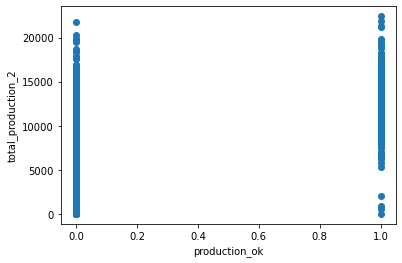

In [7]:
#visually inspect the relationship between total_production and lactation:
plt.scatter(df_new.production_ok, df_new.total_production_2)
plt.xlabel('production_ok')
plt.ylabel('total_production_2')
plt.show()

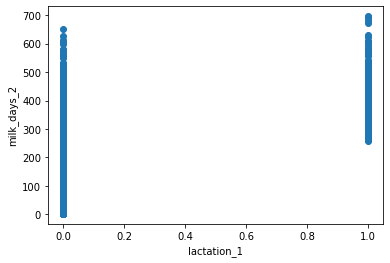

In [8]:
#visually inspect the relationship between total_production and lactation:
plt.scatter(df_new.production_ok, df_new.milk_days_2)
plt.xlabel('lactation_1')
plt.ylabel('milk_days_2')
plt.show()

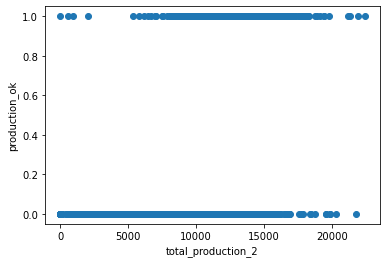

In [9]:
#visually inspect the relationship between total_production and lactation:
plt.scatter(df_new.total_production_2,df_new.production_ok)
plt.xlabel('total_production_2')
plt.ylabel('production_ok')
plt.show()

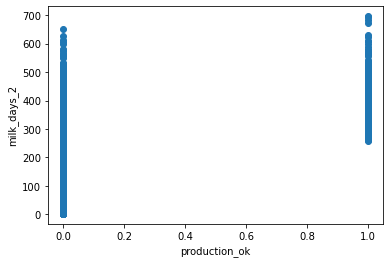

In [10]:
#visually inspect the relationship between total_production and lactation:
plt.scatter(df_new.production_ok, df_new.milk_days_2)
plt.xlabel('production_ok')
plt.ylabel('milk_days_2')
plt.show()

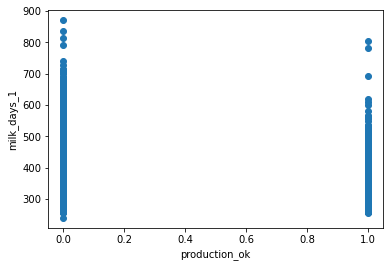

In [11]:
#visually inspect the relationship between total_production and lactation:
plt.scatter(df_new.production_ok, df_new.milk_days_1)
plt.xlabel('production_ok')
plt.ylabel('milk_days_1')
plt.show()

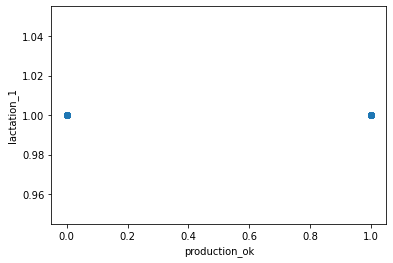

In [12]:
#visually inspect the relationship between total_production and lactation:
plt.scatter(df_new.production_ok, df_new.lactation_1)
plt.xlabel('production_ok')
plt.ylabel('lactation_1')
plt.show()

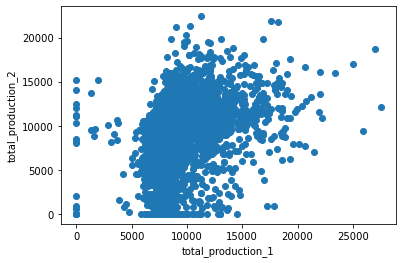

In [13]:
#visually inspect the relationship between total_production and lactation:
plt.scatter(df_new.total_production_1, df_new.total_production_2)
plt.xlabel('total_production_1')
plt.ylabel('total_production_2')
plt.show()

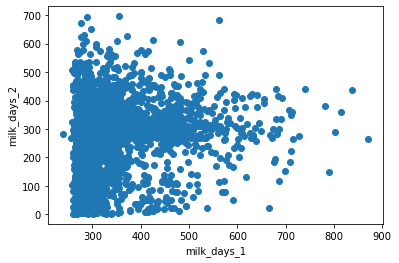

In [14]:
#visually inspect the relationship between total_production and lactation:
plt.scatter(df_new.milk_days_1, df_new.milk_days_2)
plt.xlabel('milk_days_1')
plt.ylabel('milk_days_2')
plt.show()

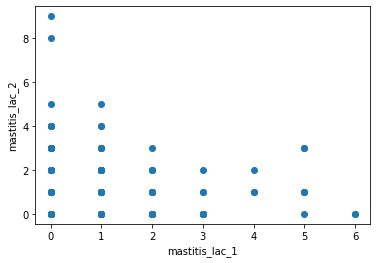

In [15]:
#visually inspect the relationship between total_production and lactation:
plt.scatter(df_new.mastitis_lac_1, df_new.mastitis_lac_2)
plt.xlabel('mastitis_lac_1')
plt.ylabel('mastitis_lac_2')
plt.show()

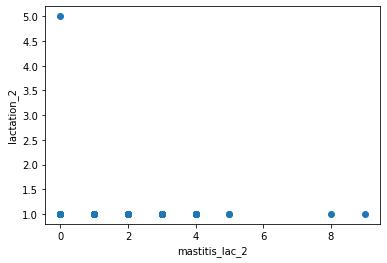

In [16]:
#visually inspect the relationship between total_production and lactation:
plt.scatter(df_new.mastitis_lac_2, df_new.lactation_2)
plt.xlabel('mastitis_lac_2')
plt.ylabel('lactation_2')
plt.show()

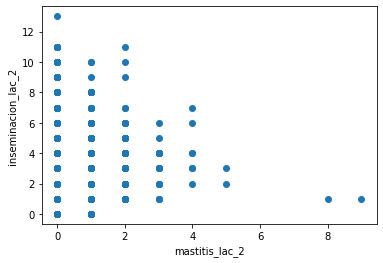

In [17]:
#visually inspect the relationship between total_production and lactation:
plt.scatter(df_new.mastitis_lac_2, df_new.inseminacion_lac_2)
plt.xlabel('mastitis_lac_2')
plt.ylabel('inseminacion_lac_2')
plt.show()

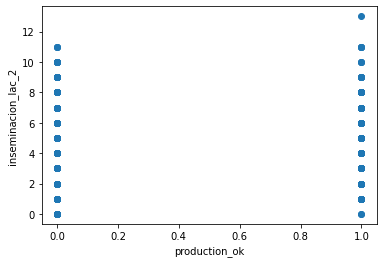

In [18]:
#visually inspect the relationship between total_production and lactation:
plt.scatter(df_new.production_ok, df_new.inseminacion_lac_2)
plt.xlabel('production_ok')
plt.ylabel('inseminacion_lac_2')
plt.show()

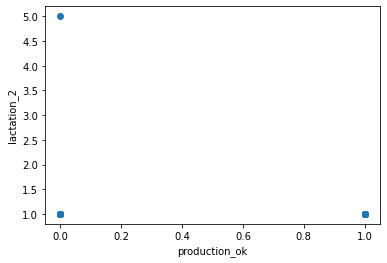

In [19]:
#visually inspect the relationship between total_production and lactation:
plt.scatter(df_new.production_ok, df_new.lactation_2)
plt.xlabel('production_ok')
plt.ylabel('lactation_2')
plt.show()

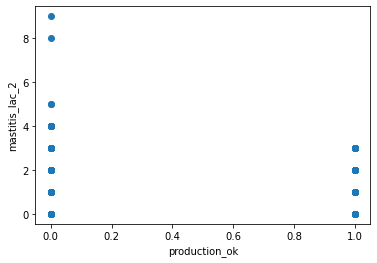

In [20]:
#visually inspect the relationship between total_production and lactation:
plt.scatter(df_new.production_ok, df_new.mastitis_lac_2)
plt.xlabel('production_ok')
plt.ylabel('mastitis_lac_2')
plt.show()

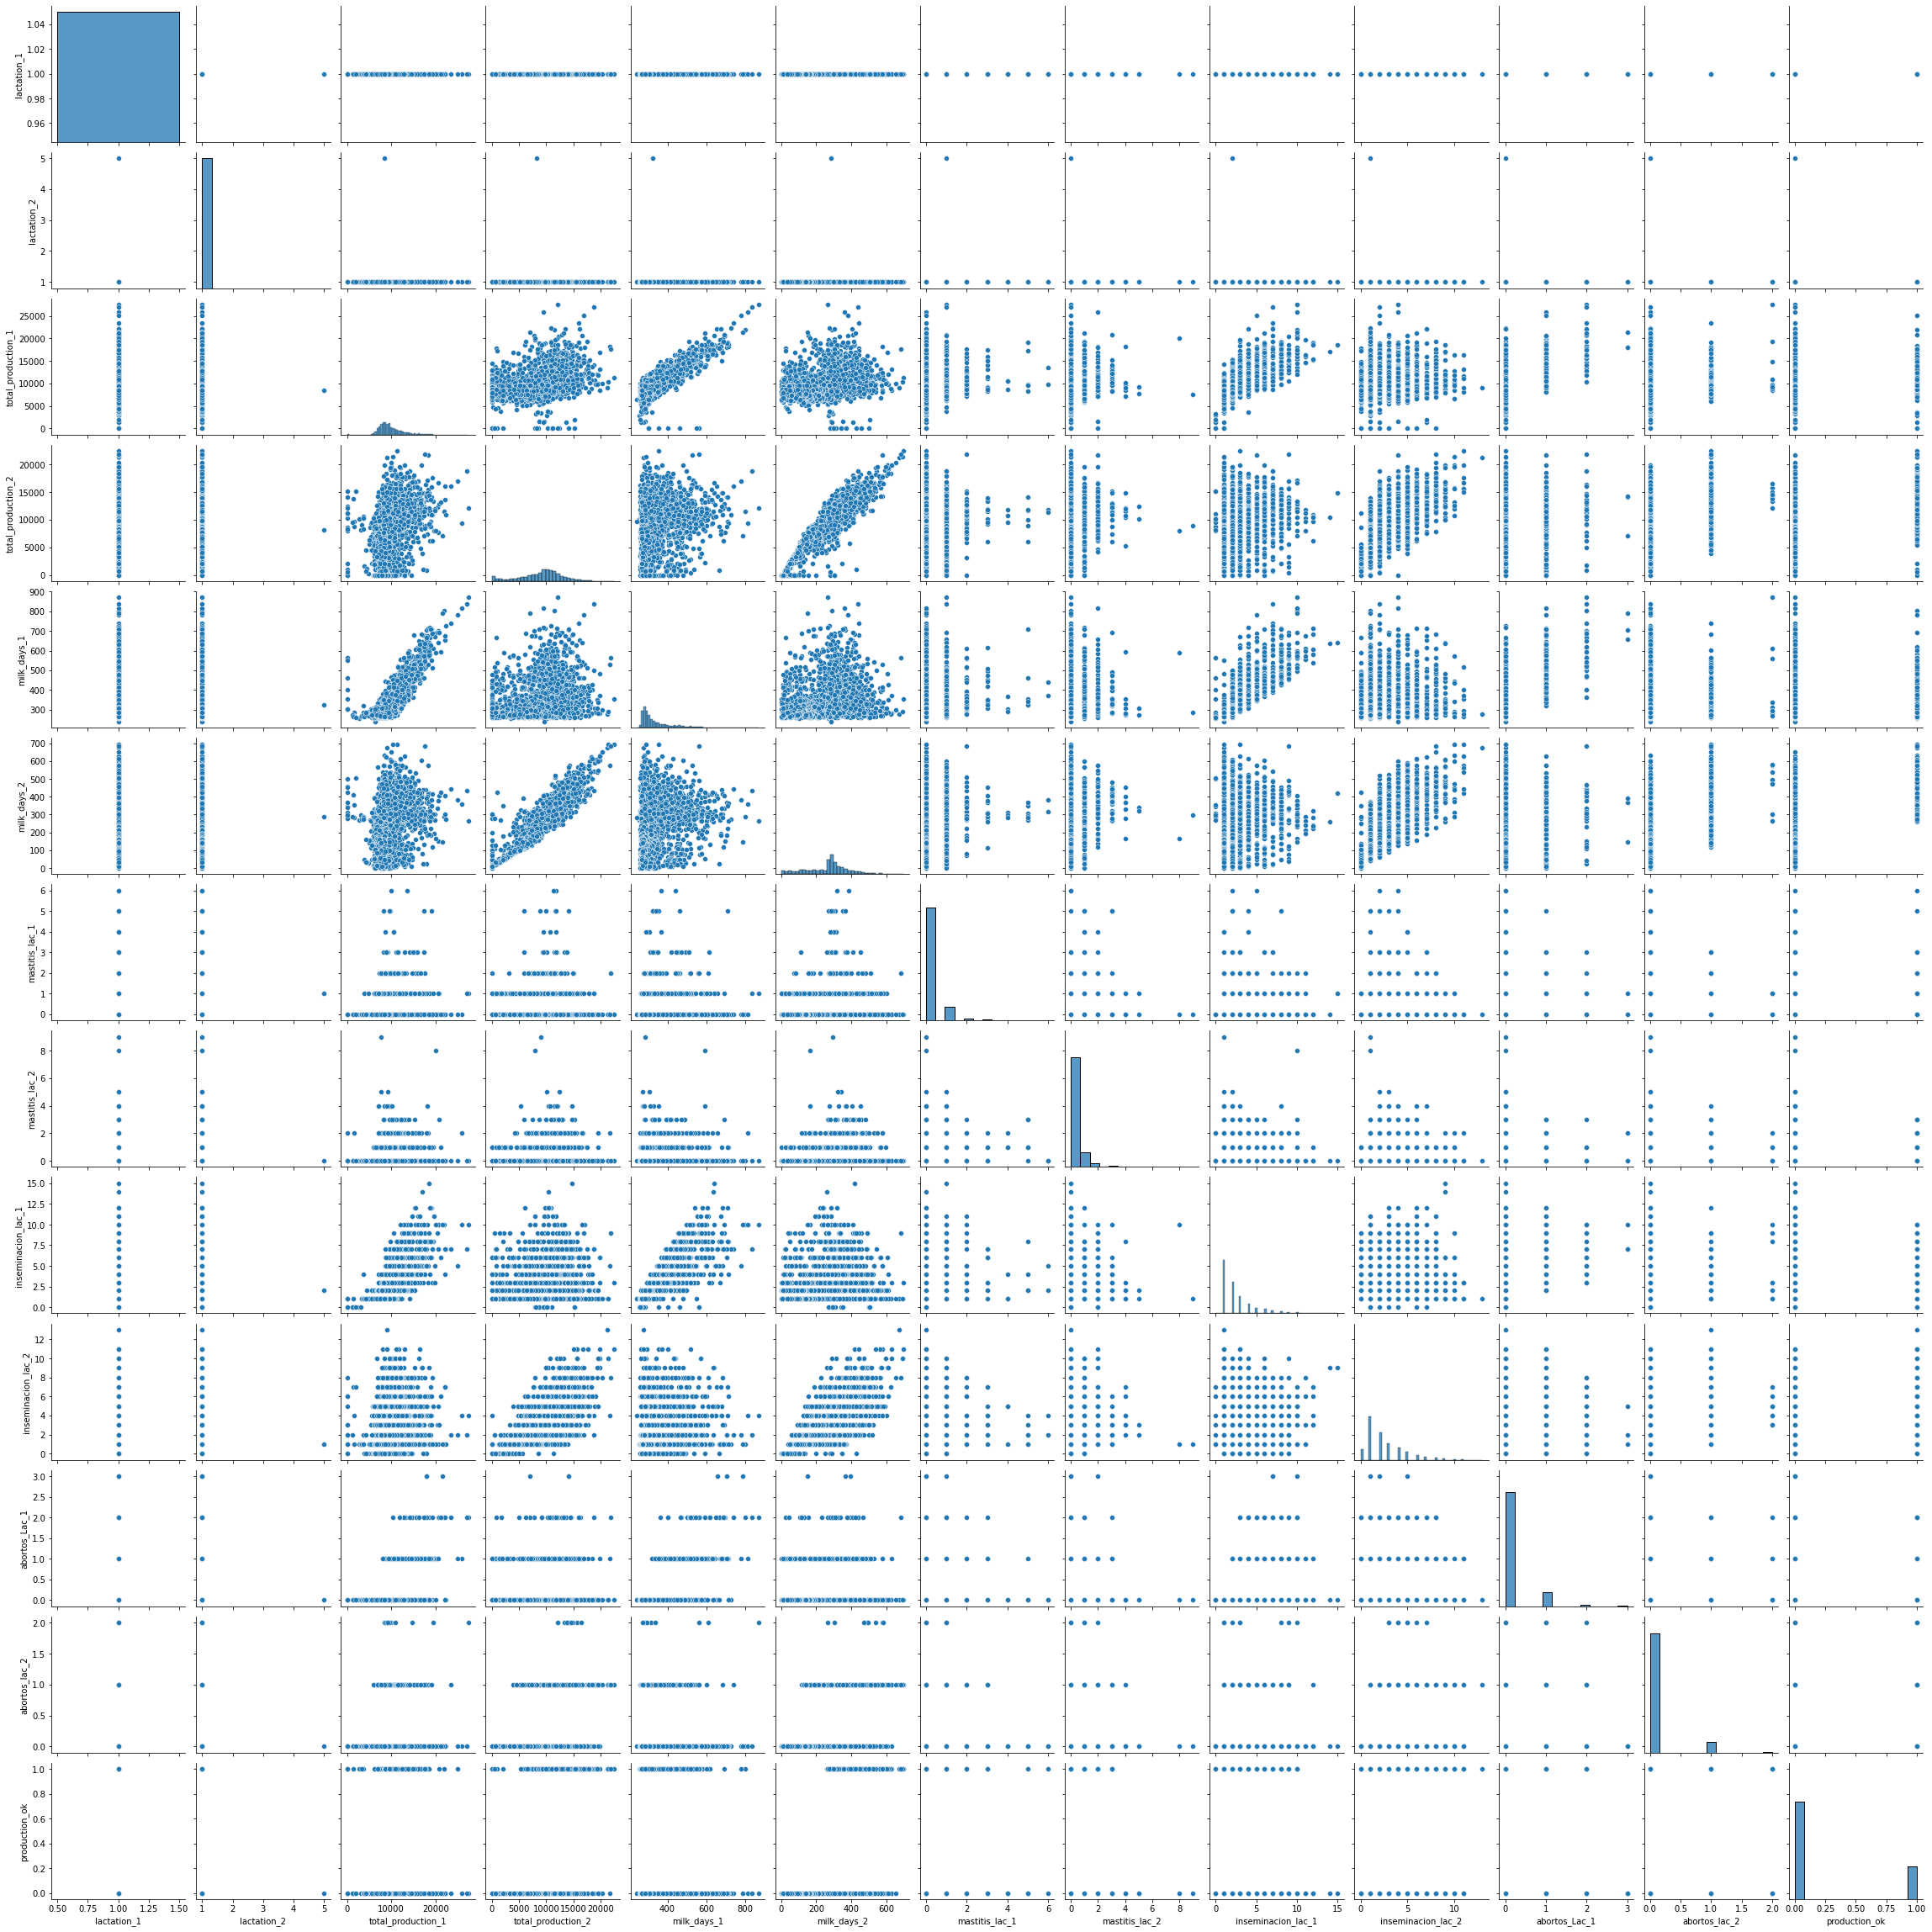

In [22]:
sns.pairplot(df_new)

In [28]:
df_new= df_new.corr(method='spearman')
df_new




,lactation_1,lactation_2,total_production_1,total_production_2,milk_days_1,milk_days_2,mastitis_lac_1,mastitis_lac_2,inseminacion_lac_1,inseminacion_lac_2,abortos_Lac_1,abortos_lac_2,production_ok
lactation_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lactation_2,NaN,1.000000,-0.010156,-0.010678,0.006899,0.001517,0.049139,-0.008196,0.002641,-0.017367,-0.007024,-0.005830,-0.011149
total_production_1,NaN,-0.010156,1.000000,0.442773,0.808928,0.303760,0.077110,0.121532,0.725410,0.179823,0.467434,0.072563,0.183879
total_production_2,NaN,-0.010678,0.442773,1.000000,0.267462,0.884982,0.073344,0.146301,0.215058,0.633594,0.107534,0.287308,0.471127
milk_days_1,NaN,0.006899,0.808928,0.267462,1.000000,0.210225,0.073681,0.092967,0.865011,0.131473,0.496197,0.031941,0.034863
milk_days_2,NaN,0.001517,0.303760,0.884982,0.210225,1.000000,0.056472,0.171823,0.137082,0.662128,0.069295,0.296922,0.450620
mastitis_lac_1,NaN,0.049139,0.077110,0.073344,0.073681,0.056472,1.000000,0.096834,0.046166,0.043456,0.057504,0.003506,-0.021864
mastitis_lac_2,NaN,-0.008196,0.121532,0.146301,0.092967,0.171823,0.096834,1.000000,0.065802,0.118164,0.045687,0.052129,0.006081
inseminacion_lac_1,NaN,0.002641,0.725410,0.215058,0.865011,0.137082,0.046166,0.065802,1.000000,0.134983,0.395899,0.042554,0.019110
inseminacion_lac_2,NaN,-0.017367,0.179823,0.633594,0.131473,0.662128,0.043456,0.118164,0.134983,1.000000,0.015247,0.283105,0.170814


<AxesSubplot:>

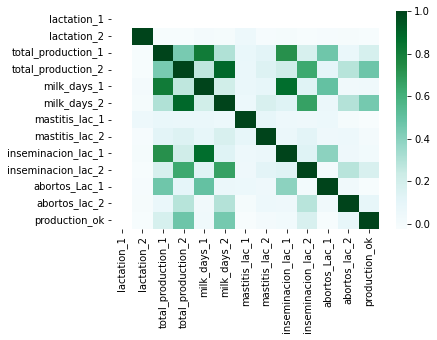

In [33]:
sns.heatmap(df_new,xticklabels= df_new.columns,yticklabels= df_new.columns,cmap='BuGn')

In [36]:
pip install pingouin

  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Created wheel for pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=194002 sha256=0307ff349c2003656be8181a0d839002b8273329a1501ea2b172591a9649d157
  Stored in directory: d:\usuarios\prestamo\appdata\local\pip\cache\wheels\74\a7\b6\5b5f03b0395fdada1f45d3aed76e7da48873a02805545ef652
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=6e497368369d22dde62763bb7c5e33da0235674ad2839feef14ed512d1596738
  Stored in directory: d:\usuarios\prestamo\appdata\local\pip\cache\wheels\d6\64\cd\32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled stat

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [48]:
import pingouin as pg
#corr= pg.pairwise_corr(df_new, method='spearman')
corr= pg.pairwise_corr(df_new, method='spearman')



In [59]:
#corr1 = corr.sort_values(by=(['p-unc'])['X', 'Y', 'n', 'r', 'p-unc'])
corr.sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']]

AttributeError: 'DataFrame' object has no attribute 'sort'

In [41]:
corr

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,lactation_2,total_production_1,spearman,two-sided,12,-0.202797,"[-0.7, 0.42]",0.527302,0.097112
1,lactation_2,total_production_2,spearman,two-sided,12,-0.678322,"[-0.9, -0.17]",0.015317,0.726151
2,lactation_2,milk_days_1,spearman,two-sided,12,-0.048951,"[-0.61, 0.54]",0.879919,0.051592
3,lactation_2,milk_days_2,spearman,two-sided,12,-0.671329,"[-0.9, -0.16]",0.016831,0.712853
4,lactation_2,mastitis_lac_1,spearman,two-sided,12,0.272727,"[-0.36, 0.73]",0.391097,0.139482
...,...,...,...,...,...,...,...,...,...
61,inseminacion_lac_2,abortos_lac_2,spearman,two-sided,12,0.881119,"[0.62, 0.97]",0.000153,0.989079
62,inseminacion_lac_2,production_ok,spearman,two-sided,12,0.797203,"[0.41, 0.94]",0.001900,0.921038
63,abortos_Lac_1,abortos_lac_2,spearman,two-sided,12,-0.188811,"[-0.69, 0.43]",0.556737,0.090416
64,abortos_Lac_1,production_ok,spearman,two-sided,12,-0.195804,"[-0.69, 0.43]",0.541936,0.093694
